In [34]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [35]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\bank.csv"

In [36]:
# load the training data from bank loan data set
df_training = pd.read_csv(location, sep=';')

In [37]:
df_training.shape

(4521, 17)

In [38]:
# is there a null value
df_training.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [39]:
# df_training = df_training.dropna()

In [40]:
df_training.shape

(4521, 17)

In [41]:
df_training.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [42]:
df_training.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [43]:
# age (numeric)
# job : type of job (categorical: 
#         “admin”, 
#         “blue-collar”, 
#         “entrepreneur”, 
#         “housemaid”, 
#         “management”, 
#         “retired”, 
#         “self-employed”, 
#         “services”,
#         “student”, 
#         “technician”, 
#         “unemployed”, 
#         “unknown”)
# marital : marital status (categorical: 
#           “divorced”, “married”, “single”, “unknown”)
# education (categorical: 
#         “basic.4y”, 
#         “basic.6y”, 
#         “basic.9y”, 
#         “high.school”, 
#         “illiterate”, 
#         “professional.course”, 
#         “university.degree”, 
#         “unknown”)

# default: has credit in default? (categorical: “no”, “yes”, “unknown”)

# housing: has housing loan? (categorical: “no”, “yes”, “unknown”)

# loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

# contact: contact communication type (categorical: “cellular”, “telephone”)

# month: last contact month of year 
#        (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

# day_of_week: last contact day of the week 
#        (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)

# duration: last contact duration, in seconds (numeric). 
#   Important note: this attribute highly affects the output target 
#     (e.g., if duration=0 then y=’no’). The duration is not known before a 
#     call is performed, also, after the end of the call, y is obviously known. 
#     Thus, this input should only be included for benchmark purposes and 
#     should be discarded if the intention is to have a realistic predictive 
#     model

# campaign: number of contacts performed during this campaign and for this client 
#            (numeric, includes last contact)

# pdays: number of days that passed by after the client was last contacted from a previous 
#        campaign 
#        (numeric; 999 means client was not previously contacted)

# previous: number of contacts performed before this campaign and for this client (numeric)

# poutcome: outcome of the previous marketing campaign 
#           (categorical: “failure”, “nonexistent”, “success”)

# emp.var.rate: employment variation rate — (numeric)
# cons.price.idx: consumer price index — (numeric)
# cons.conf.idx: consumer confidence index — (numeric)
# euribor3m: euribor 3 month rate — (numeric)
# nr.employed: number of employees — (numeric)

In [44]:
# Predict variable (desired target):

# y — has the client subscribed a term deposit? 
#     (binary: “1”, means “Yes”, “0” means “No”)

In [45]:
df_training['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [46]:
df_training['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [47]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
df_training['education']=np.where(df_training['education'] =='basic.9y', 'Basic', df_training['education'])
df_training['education']=np.where(df_training['education'] =='basic.6y', 'Basic', df_training['education'])
df_training['education']=np.where(df_training['education'] =='basic.4y', 'Basic', df_training['education'])

In [48]:
df_training['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [49]:
# data exploration
df_training['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

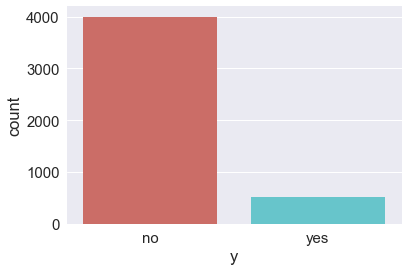

In [50]:
# There are 36548 no’s and 4640 yes’s in the outcome variables.
sns.countplot(x='y', data=df_training, palette='hls')

In [51]:
# Let’s get a sense of the numbers across the two classes.
df_training.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [52]:
# the average age of customers who bought the term deposit is higher 
# than that of the customers who didn’t.

# The pdays (days since the customer was last contacted) is understandably 
# lower for the customers who bought it. 

# The lower the pdays, the better the memory of the last call and hence 
# the better chances of a sale.

# Surprisingly, campaigns (number of contacts or calls made during the current campaign) 
# are lower for customers who bought the term deposit.

# We can calculate categorical means for other categorical variables such as education and marital status to 
# get a more detailed sense of our data.

In [53]:
df_training.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


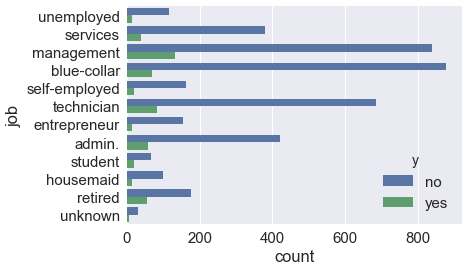

In [54]:
# Customer job distribution
sns.countplot(y="job", data=df_training, hue='y')

In [55]:
df_training.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


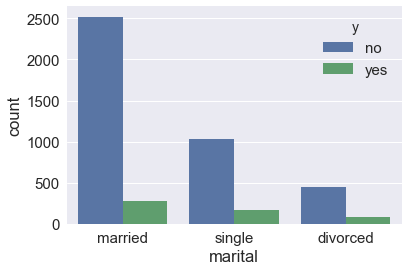

In [56]:
# Customer marital status distribution
sns.countplot(x="marital", data=df_training, hue='y')

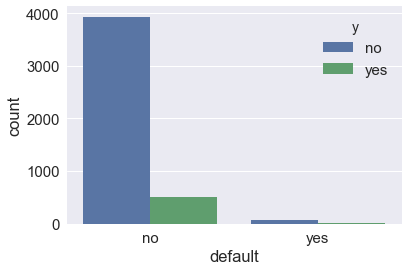

In [57]:
# Barplot for credit in default
sns.countplot(x="default", data=df_training, hue='y')

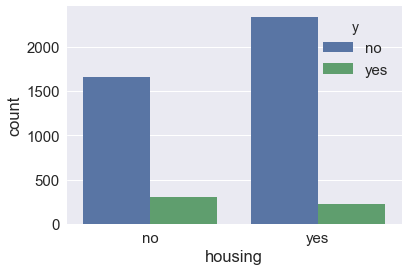

In [58]:
# Barplot for housing loan
sns.countplot(x="housing", data=df_training, hue='y')

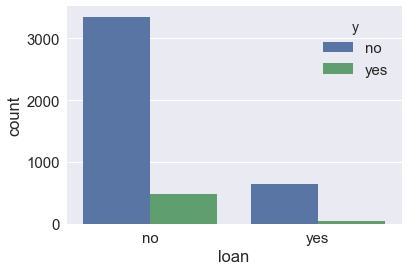

In [59]:
# Barplot for personal loan
sns.countplot(x="loan", data=df_training, hue='y')

In [60]:
df_training.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


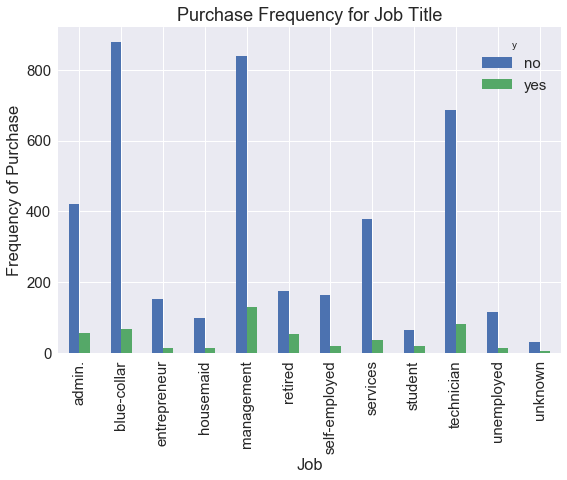

In [61]:
# Visualizations
# The frequency of purchase of the deposit depends a great deal on the job title. 
# Thus, the job title can be a good predictor of the outcome variable.
%matplotlib inline
pd.crosstab(df_training.job, df_training.y).plot(kind='bar', figsize=(9,6))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

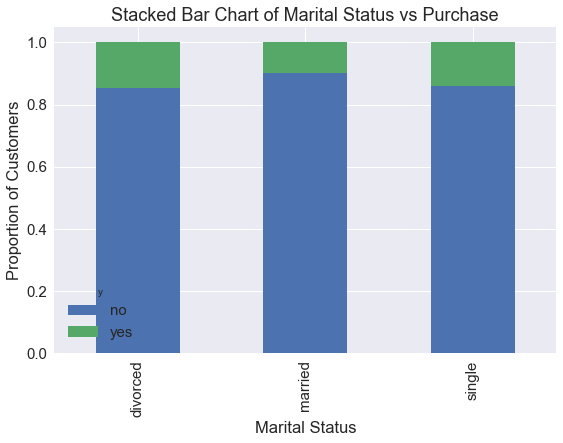

In [62]:
# The marital status does not seem a strong predictor for the outcome variable.

table=pd.crosstab(df_training.marital, df_training.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(9,6))

plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

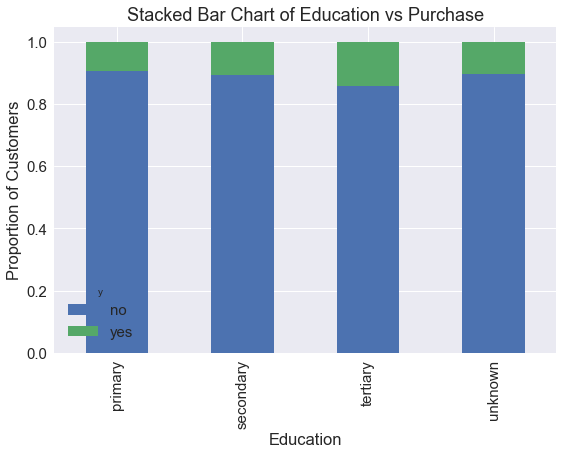

In [63]:
# Education seems a good predictor of the outcome variable.
table=pd.crosstab(df_training.education, df_training.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(9,6))
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [64]:
# Day of week may not be a good predictor of the outcome.
pd.crosstab(df_training.day_of_week, df_training.y).plot(kind='bar', figsize=(9,6))
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

AttributeError: 'DataFrame' object has no attribute 'day_of_week'

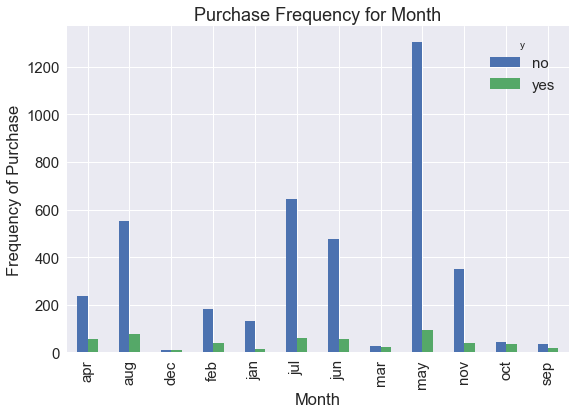

In [65]:
# Month might be a good predictor of the outcome variable.
pd.crosstab(df_training.month, df_training.y).plot(kind='bar', figsize=(9,6))
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

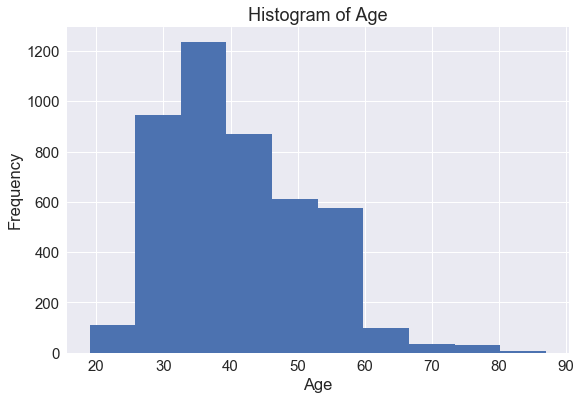

In [66]:
# Most of the customers of the bank in this dataset are in the age range of 30–40
df_training.age.hist( figsize=(9,6))
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

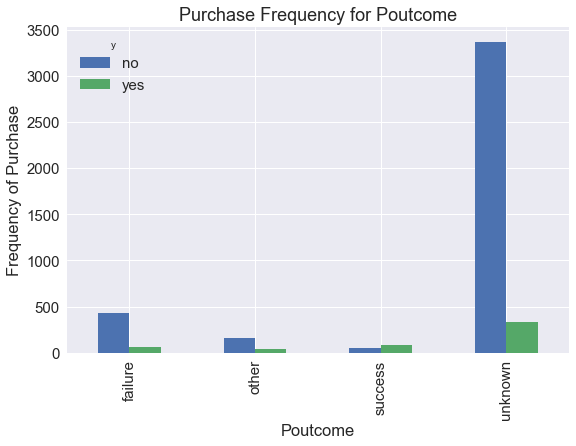

In [67]:
# Poutcome seems to be a good predictor of the outcome variable.
pd.crosstab(df_training.poutcome, df_training.y).plot(kind='bar', figsize=(9,6))
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [68]:
# Our prediction will be based on the 
# - customer’s job, 
# - marital status, 
# - whether he(she) has credit in default, 
# - whether he(she) has a housing loan, 
# - whether he(she) has a personal loan, 
# - and the outcome of the previous marketing campaigns. 

# So, we will drop the variables that we do not need.

In [69]:
# Data Preprocessing

# Create dummy variables, that is variables with only two values, zero and one.

# In logistic regression models, encoding all of the independent variables as dummy variables 
# allows easy interpretation and calculation of the odds ratios, and increases the stability and 
# significance of the coefficients.

In [70]:
df_training.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [71]:
used_features   = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

df_X = df_training[used_features]
df_y = df_training['y']

In [72]:
print(df_X.shape)
print(df_y.shape)

(4521, 6)
(4521,)


In [73]:
df_training_dummied = pd.get_dummies(df_X, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [93]:
df_training_dummied.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

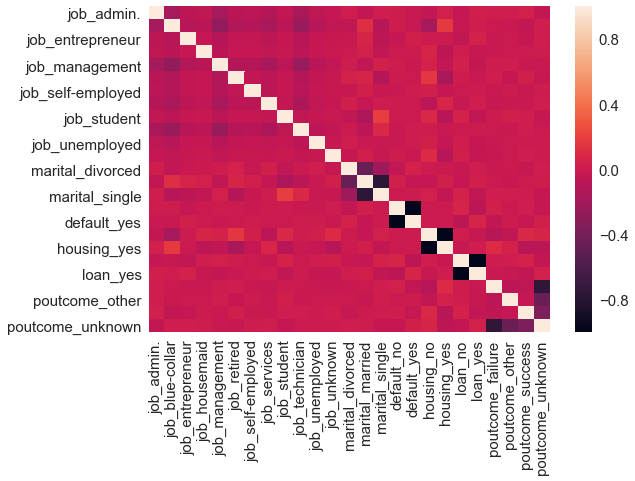

In [75]:
# Check the independence between the independent variables
plt.figure(figsize=(9,6))
sns.heatmap(df_training_dummied.corr())

In [76]:
# there isnt any significant co-relation among the features

In [77]:
# Split the data into training and test sets
X = df_training_dummied.values
y = df_y.values

In [78]:
X.shape

(4521, 25)

In [79]:
y.shape

(4521,)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [81]:
X_train.shape

(3390, 25)

In [82]:
X_test.shape

(1131, 25)

In [83]:
y_train.shape

(3390,)

In [84]:
y_test.shape

(1131,)

In [85]:
# Fit logistic regression to the training set
classifier = LogisticRegression(random_state=5)
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[986   8]
 [115  22]]


In [88]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94       994
         yes       0.73      0.16      0.26       137

   micro avg       0.89      0.89      0.89      1131
   macro avg       0.81      0.58      0.60      1131
weighted avg       0.88      0.89      0.86      1131



# Classifier visualization playground

The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, we’ll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

In [91]:
from sklearn.decomposition import PCA

X = df_training_dummied.iloc[:,1:]
y = df_training_dummied.iloc[:,0]


In [94]:
pca = PCA(n_components=2).fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

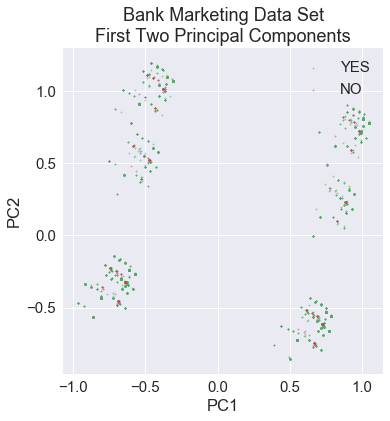

In [99]:
plt.figure(figsize=(15, 6))
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='g')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='r')

plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [102]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
    


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


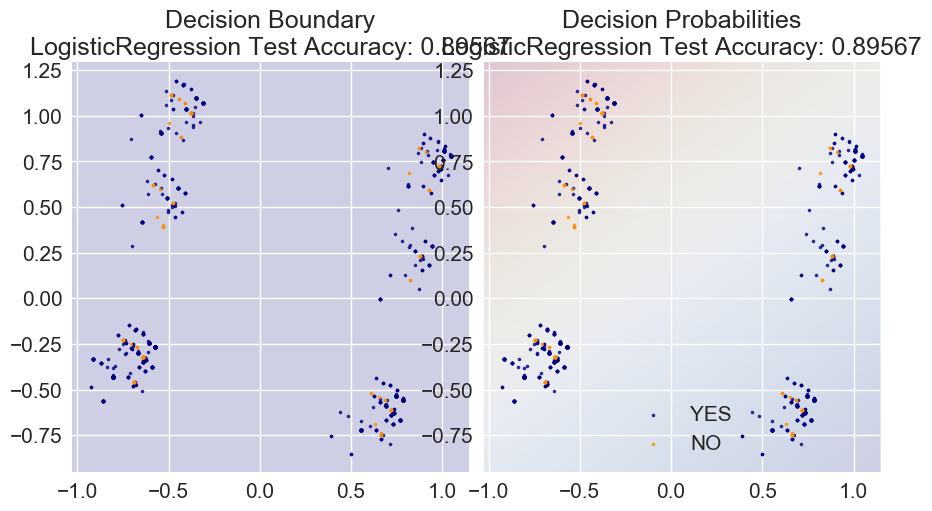

In [103]:
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()